In [22]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
df = pd.read_csv('FIFA21_official_data.csv')

In [21]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [9]:
len(df)

17108

In [12]:
df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
DefensiveAwareness     float64
Length: 65, dtype: object

In [13]:
t2 = df.describe()
t2 = t2.T
t2

,count,mean,std,min,25%,50%,75%,max
ID,17108.0,221421.276187,36028.786065,2.0,205451.75,230441.0,245402.5,259105.0
Age,17108.0,25.053718,4.915963,16.0,21.00,24.0,28.0,53.0
Overall,17108.0,66.780161,7.019069,38.0,62.00,67.0,72.0,93.0
Potential,17108.0,72.553542,5.738347,46.0,69.00,72.0,76.0,95.0
Special,17108.0,1625.722995,263.503922,731.0,1484.00,1653.0,1810.0,2316.0
International Reputation,17108.0,1.147533,0.455773,1.0,1.00,1.0,1.0,5.0
Weak Foot,17108.0,2.981938,0.674699,1.0,3.00,3.0,3.0,5.0
Skill Moves,17108.0,2.446107,0.780278,1.0,2.00,2.0,3.0,5.0
Jersey Number,17088.0,20.756145,17.194590,1.0,9.00,18.0,27.0,99.0
Crossing,17108.0,51.360065,17.954050,6.0,40.00,55.0,65.0,94.0


In [16]:
corr = df.corr()
corr.round(2)

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
ID,1.00,-0.75,-0.47,0.01,-0.27,-0.54,-0.11,-0.10,0.16,-0.17,...,-0.11,-0.08,-0.06,-0.09,-0.10,-0.12,-0.11,-0.09,-0.42,-0.15
Age,-0.75,1.00,0.54,-0.21,0.30,0.41,0.10,0.09,-0.24,0.16,...,0.16,0.11,0.09,0.12,0.12,0.13,0.13,0.12,0.48,0.17
Overall,-0.47,0.54,1.00,0.59,0.62,0.47,0.21,0.35,-0.21,0.40,...,0.21,0.24,0.22,0.04,0.04,0.04,0.04,0.04,0.99,0.31
Potential,0.01,-0.21,0.59,1.00,0.34,0.29,0.14,0.24,0.02,0.22,...,0.09,0.15,0.14,-0.01,-0.01,-0.00,-0.00,-0.01,0.63,0.16
Special,-0.27,0.30,0.62,0.34,1.00,0.28,0.33,0.72,-0.13,0.85,...,0.43,0.52,0.49,-0.62,-0.63,-0.62,-0.62,-0.63,0.65,0.56
International Reputation,-0.54,0.41,0.47,0.29,0.28,1.00,0.13,0.17,-0.07,0.19,...,0.13,0.09,0.08,0.01,0.02,0.03,0.02,0.02,0.45,0.12
Weak Foot,-0.11,0.10,0.21,0.14,0.33,0.13,1.00,0.34,-0.03,0.29,...,-0.07,0.00,-0.02,-0.20,-0.21,-0.20,-0.20,-0.21,0.22,0.03
Skill Moves,-0.10,0.09,0.35,0.24,0.72,0.17,0.34,1.00,-0.03,0.72,...,-0.04,0.15,0.12,-0.58,-0.58,-0.58,-0.58,-0.58,0.38,0.19
Jersey Number,0.16,-0.24,-0.21,0.02,-0.13,-0.07,-0.03,-0.03,1.00,-0.06,...,-0.15,-0.10,-0.09,-0.01,-0.02,-0.02,-0.02,-0.02,-0.21,-0.12
Crossing,-0.17,0.16,0.40,0.22,0.85,0.19,0.29,0.72,-0.06,1.00,...,0.28,0.41,0.39,-0.65,-0.65,-0.63,-0.64,-0.65,0.41,0.43


<AxesSubplot:>

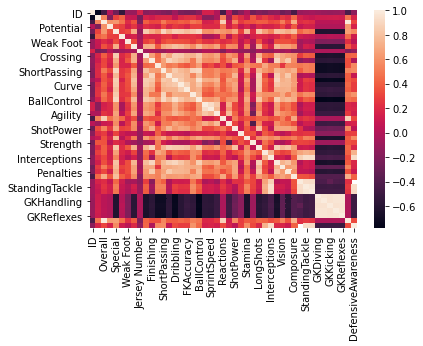

In [17]:
sns.heatmap(corr)

In [28]:
df['high_quality']=df['Best Overall Rating'].apply(lambda x: 1 if x>=75 else 0)

In [29]:
df1 = df[['BallControl','ShotPower','Finishing','SprintSpeed','high_quality']]
df1

,BallControl,ShotPower,Finishing,SprintSpeed,high_quality
0,84.0,89.0,92.0,68.0,1
1,92.0,91.0,82.0,76.0,1
2,88.0,89.0,77.0,76.0,1
3,89.0,81.0,88.0,79.0,1
4,87.0,82.0,66.0,75.0,1
...,...,...,...,...,...
17103,11.0,26.0,5.0,18.0,0
17104,14.0,39.0,9.0,25.0,0
17105,16.0,38.0,7.0,26.0,0
17106,12.0,37.0,7.0,22.0,0


In [322]:
X = np.array(df2[['BallControl','Stamina','Reactions','Potential']])
y = np.array(df['high_quality'])

In [323]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.20, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [324]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [325]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

**Validate**

In [326]:
y_validate_pred = knn_model.predict(x_validate)

In [327]:
y_validate_pred

array([0, 0, 1, ..., 0, 0, 0])

In [328]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [329]:
print(accuracy, precision, recall, f1)

0.9491525423728814 0.8674698795180723 0.8 0.8323699421965319


**Test**

In [330]:
y_pred = knn_model.predict(x_test)

In [331]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [332]:
print(accuracy, precision, recall, f1)

0.9549970777323202 0.8611111111111112 0.8378378378378378 0.8493150684931507


**ROC CURVE**

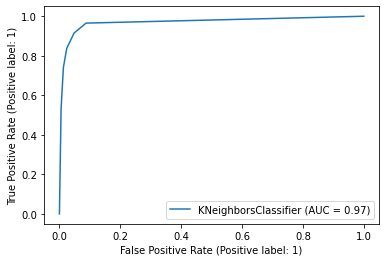

In [333]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

**Normalizing Data**

In [249]:
df2 = pd.read_csv('FIFA21_official_data.csv')

In [250]:
def minmax_scaler(x):
    xmin = np.min(x)
    xmax = np.max(x)
    output = (x-xmin)/(xmax-xmin)
    return output

In [251]:
df2.BallControl = minmax_scaler(df2.BallControl)
df2.Stamina = minmax_scaler(df2.Stamina)
df2.Reactions = minmax_scaler(df2.Reactions)
df2.Potential = minmax_scaler(df2.Potential)

In [252]:
df2 = df2[['BallControl','Stamina','Reactions','Potential']]

In [253]:
df2.head()

,BallControl,Stamina,Reactions,Potential
0,0.868132,0.779070,0.944444,0.836735
1,0.956044,0.906977,0.930556,0.918367
2,0.912088,0.965116,0.861111,0.897959
3,0.923077,0.872093,0.944444,0.836735
4,0.901099,0.918605,0.819444,0.755102
